In [57]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('cardekho.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [59]:
df['max_power'] = df['max_power'].str.replace('bhp', '', regex=False).str.strip()
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')


# Splitting data before null imputation and other data cleaning process to save it from data leakage.


In [60]:
from sklearn.model_selection import train_test_split

df_1, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_1, test_size=0.2, random_state=42)  # 0.2 x 0.8 = 0.16


In [61]:
df_train.shape, df_val.shape, df_test.shape

((5201, 12), (1301, 12), (1626, 12))

# Columns having null values: mileage, engine, max_power, seats

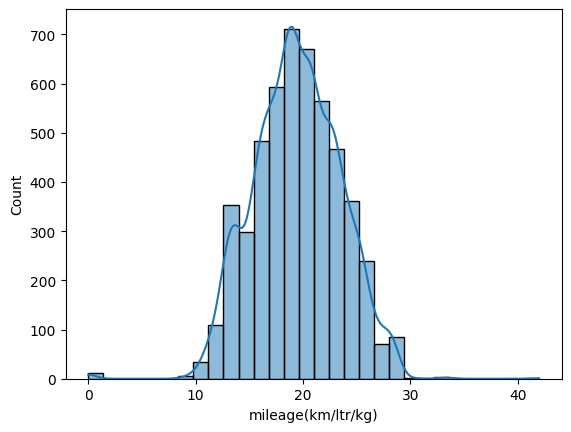

In [62]:
#Checking for behaviour of mileage column

import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df_train['mileage(km/ltr/kg)'], bins=30, kde=True)
plt.show()

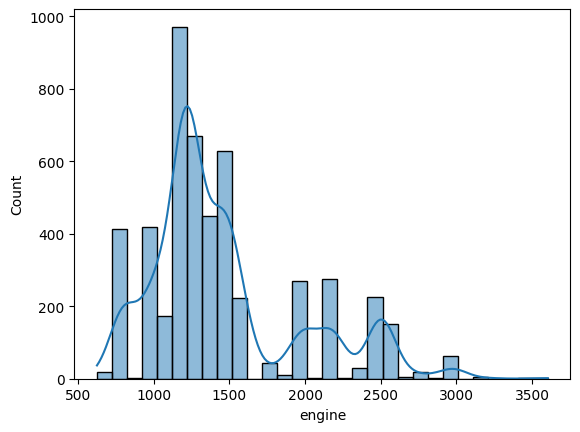

In [63]:
#Checking for engine

sns.histplot(df_train['engine'], bins=30, kde=True)
plt.show()

In [64]:
df_train['max_power'].nunique()

292

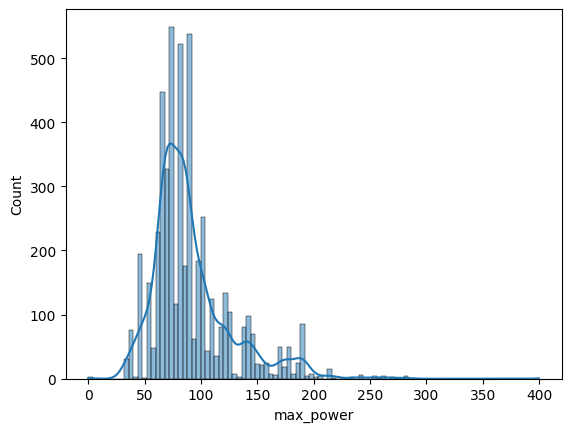

In [65]:
#Checking for max_power column

sns.histplot(df_train['max_power'], bins=100, kde=True)
plt.show()

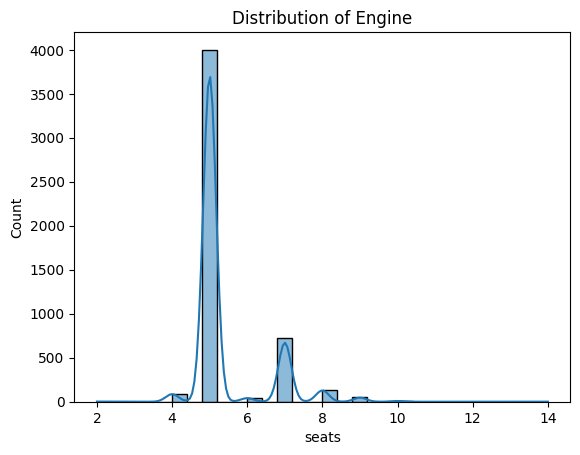

In [66]:
#Checking for seats column

sns.histplot(df_train['seats'], bins=30, kde=True)
plt.title('Distribution of Engine')
plt.show()

# Imputing Null values.

In [67]:
mean_mileage = df_train['mileage(km/ltr/kg)'].mean()
median_engine = df_train['engine'].median()
median_max_power = df_train['max_power'].median()
mode_seats = df_train['seats'].mode()[0]

In [68]:
df_train['mileage(km/ltr/kg)'] = df_train['mileage(km/ltr/kg)'].fillna(df_train['mileage(km/ltr/kg)'].mean())
df_train['engine'] = df_train['engine'].fillna(df_train['engine'].median())
df_train['max_power'] = df_train['max_power'].fillna(df_train['max_power'].median())
df_train['seats'] = df_train['seats'].fillna(df_train['seats'].mode()[0])

In [69]:
df_val['mileage(km/ltr/kg)'] = df_val['mileage(km/ltr/kg)'].fillna(mean_mileage)
df_val['engine'] = df_val['engine'].fillna(median_engine)
df_val['max_power'] = df_val['max_power'].fillna(median_max_power)
df_val['seats'] = df_val['seats'].fillna(mode_seats)

In [70]:
df_test['mileage(km/ltr/kg)'] = df_test['mileage(km/ltr/kg)'].fillna(mean_mileage)
df_test['engine'] = df_test['engine'].fillna(median_engine)
df_test['max_power'] = df_test['max_power'].fillna(median_max_power)
df_test['seats'] = df_test['seats'].fillna(mode_seats)

In [71]:
df_test.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [72]:
df_train.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [73]:
df_train.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

# Checking for duplicated rows

In [74]:
df_train.duplicated().sum(), df_test.duplicated().sum(), df_val.duplicated().sum()

(np.int64(617), np.int64(136), np.int64(95))

In [75]:
df_train = df.drop_duplicates()
df_val = df_val.drop_duplicates()
df_test = df_test.drop_duplicates()

In [76]:
df_train.duplicated().sum(), df_test.duplicated().sum(), df_val.duplicated().sum()

(np.int64(0), np.int64(0), np.int64(0))

In [77]:
df_train.shape, df_val.shape, df_test.shape

((6926, 12), (1206, 12), (1490, 12))

# Encoding columns

In [78]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
1971,Honda City 1.5 GXI,2004,198000,110000,Petrol,Individual,Manual,Third Owner,12.8,1493.0,100.00,5.0
4664,Tata Safari Storme EX,2014,500000,291977,Diesel,Individual,Manual,First Owner,14.0,2179.0,138.10,7.0
5448,Maruti Ritz VDi,2016,425000,70000,Diesel,Individual,Manual,First Owner,23.2,1248.0,73.94,5.0
3333,Honda City 2017-2020 VTEC,2006,150000,120000,Petrol,Individual,Manual,Second Owner,16.9,1497.0,100.00,5.0
2316,Maruti Swift VDI,2013,525000,69000,Diesel,Individual,Manual,Second Owner,22.9,1248.0,74.00,5.0


In [79]:
df_test['name'].nunique()

861

In [80]:
df_test['name'].head()

1971           Honda City 1.5 GXI
4664        Tata Safari Storme EX
5448              Maruti Ritz VDi
3333    Honda City 2017-2020 VTEC
2316             Maruti Swift VDI
Name: name, dtype: object

# Extracting first 2 words 'car_model' feature to make it simple for our model to understand after encoding.

In [81]:
df_test['car_model'] = df_test['name'].apply(lambda x: ' '.join(str(x).split()[:2]))


In [82]:
df_test['car_model'].head()

1971      Honda City
4664     Tata Safari
5448     Maruti Ritz
3333      Honda City
2316    Maruti Swift
Name: car_model, dtype: object

In [83]:
df_train['car_model'] = df_train['name'].apply(lambda x: ' '.join(str(x).split()[:2]))
df_val['car_model'] = df_val['name'].apply(lambda x: ' '.join(str(x).split()[:2]))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_36992\4159328407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['car_model'] = df_train['name'].apply(lambda x: ' '.join(str(x).split()[:2]))


In [84]:
df_train['car_model'].head()

0    Maruti Swift
1     Skoda Rapid
2      Honda City
3     Hyundai i20
4    Maruti Swift
Name: car_model, dtype: object

In [85]:
df_val['car_model'].head()

5743     Mahindra KUV
3594    Hyundai Verna
4139        Ford Figo
7558      Hyundai i20
4809     Maruti Wagon
Name: car_model, dtype: object

In [86]:
df_test = df_test.drop(columns=['name'])
df_train = df_train.drop(columns=['name'])
df_val = df_val.drop(columns=['name'])

In [87]:
df_train.shape, df_val.shape, df_test.shape

((6926, 12), (1206, 12), (1490, 12))

In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                6926 non-null   int64  
 1   selling_price       6926 non-null   int64  
 2   km_driven           6926 non-null   int64  
 3   fuel                6926 non-null   object 
 4   seller_type         6926 non-null   object 
 5   transmission        6926 non-null   object 
 6   owner               6926 non-null   object 
 7   mileage(km/ltr/kg)  6718 non-null   float64
 8   engine              6718 non-null   float64
 9   max_power           6720 non-null   float64
 10  seats               6718 non-null   float64
 11  car_model           6926 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 703.4+ KB


In [89]:
df_train.isna().sum()

year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    208
engine                208
max_power             206
seats                 208
car_model               0
dtype: int64

In [90]:
df_test.isna().sum()

year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
car_model             0
dtype: int64

In [91]:
df_val.isna().sum()

year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
car_model             0
dtype: int64

In [92]:
df_train = df_train.dropna()

In [93]:
df_train.isnull().sum()

year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
car_model             0
dtype: int64

In [94]:
df_train.duplicated().sum()

np.int64(19)

In [95]:
df_train = df_train.drop_duplicates()

In [96]:
df_train.duplicated().sum()

np.int64(0)

In [97]:
df_val.duplicated().sum()

np.int64(0)

In [98]:
df_test.duplicated().sum()

np.int64(0)

In [99]:
df_train['car_model'].nunique()

200

In [100]:
df_train['car_model'] = df_train['car_model'].str.lower()
df_val['car_model'] = df_val['car_model'].str.lower()
df_test['car_model'] = df_test['car_model'].str.lower()

In [101]:
df_train['car_model'].head()

0    maruti swift
1     skoda rapid
2      honda city
3     hyundai i20
4    maruti swift
Name: car_model, dtype: object

In [102]:
df_train.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,maruti swift
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,skoda rapid
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,honda city
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,hyundai i20
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,maruti swift


# Encoding 
## Encoding Categorical features using OrdinalEncoder because it has an attribute called 'unknown_value' which helps us deal with unknown data from test or validation dataset.

In [103]:
from sklearn.preprocessing import OrdinalEncoder
Oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

cat_features = ['car_model', 'fuel', 'seller_type', 'transmission', 'owner']
cat_features
df_train[cat_features] = Oe.fit_transform(df_train[cat_features])
df_val[cat_features] = Oe.transform(df_val[cat_features])
df_test[cat_features] = Oe.transform(df_test[cat_features])

In [104]:
df_train['car_model'].head()

0    116.0
1    153.0
2     52.0
3     66.0
4    116.0
Name: car_model, dtype: float64

In [105]:
df_val['car_model'].head()

5743     85.0
3594     72.0
4139     43.0
7558     66.0
4809    119.0
Name: car_model, dtype: float64

In [106]:
df_test['car_model'].head()

1971     52.0
4664    166.0
5448    113.0
3333     52.0
2316    116.0
Name: car_model, dtype: float64

In [107]:
df_train.shape, df_val.shape, df_test.shape

((6698, 12), (1206, 12), (1490, 12))

In [108]:
df_train.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_model
0,2014,450000,145500,1.0,1.0,1.0,0.0,23.40,1248.0,74.00,5.0,116.0
1,2014,370000,120000,1.0,1.0,1.0,2.0,21.14,1498.0,103.52,5.0,153.0
2,2006,158000,140000,3.0,1.0,1.0,4.0,17.70,1497.0,78.00,5.0,52.0
3,2010,225000,127000,1.0,1.0,1.0,0.0,23.00,1396.0,90.00,5.0,66.0
4,2007,130000,120000,3.0,1.0,1.0,0.0,16.10,1298.0,88.20,5.0,116.0


# Scaling and seperating the features and target variables

In [110]:
X_train = df_train.drop('selling_price', axis=1)
y_train = df_train['selling_price']

X_val = df_val.drop('selling_price', axis=1)
y_val = df_val['selling_price']

X_test = df_test.drop('selling_price', axis=1)
y_test = df_test['selling_price']

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [113]:
X_train_scaled

array([[ 0.1005414 ,  1.22807736, -0.88042442, ..., -0.43443754,
        -0.4410688 ,  0.34649841],
       [ 0.1005414 ,  0.79368552, -0.88042442, ...,  0.49573515,
        -0.4410688 ,  1.1818631 ],
       [-1.95102383,  1.13438501,  1.11587983, ..., -0.30839788,
        -0.4410688 , -1.09845675],
       ...,
       [-0.15590426,  0.62333577,  1.11587983, ..., -0.1555748 ,
        -0.4410688 , -0.78237281],
       [-1.69457818,  0.77665054, -0.88042442, ...,  0.6999194 ,
        -0.4410688 , -0.64690826],
       [-1.18168687,  0.79368552, -0.88042442, ..., -0.43758854,
        -0.4410688 ,  0.34649841]])

In [117]:
X_train.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_model
0,2014,145500,1.0,1.0,1.0,0.0,23.40,1248.0,74.00,5.0,116.0
1,2014,120000,1.0,1.0,1.0,2.0,21.14,1498.0,103.52,5.0,153.0
2,2006,140000,3.0,1.0,1.0,4.0,17.70,1497.0,78.00,5.0,52.0
3,2010,127000,1.0,1.0,1.0,0.0,23.00,1396.0,90.00,5.0,66.0
4,2007,120000,3.0,1.0,1.0,0.0,16.10,1298.0,88.20,5.0,116.0


# Building model


## Starting with linear regression as our base model

In [121]:
#Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_val_pred = lr.predict(X_val_scaled)

In [123]:
from sklearn.metrics import r2_score

In [ ]:
print(f'R_Score of simple Linear Regression model for validation data: {r2_score(y_val, y_val_pred)}')

0.6279857743757968

In [127]:
from sklearn.linear_model import Ridge

lr1 = Ridge(alpha=1.0)


lr1.fit(X_train_scaled, y_train)

y_val_pred = lr1.predict(X_val_scaled)

In [ ]:
print(f'R_Score of simple Ridge model for validation data: {r2_score(y_val, y_val_pred)}')

0.627975417939926

In [ ]:
print(f'R_Score of simple Ridge model for Train data: {r2_score(y_train, lr1.predict(X_train_scaled))}')

0.6199627333275067

### Even after using Ridge, linear model is not able to capture the varaince of validation data, hence moving forward with tree based models.

# Using Random Forest first.

In [139]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=3)

rf.fit(X_train_scaled, y_train)

y_val_predictrf = rf.predict(X_val_scaled)


In [ ]:
print(f'R_Score of simple Random Forest Regression model for validation data: {r2_score(y_val, y_val_predictrf)}')

0.8341825211462179

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_val, y_val_predictrf)

print(f'Mean Absolute Error for Random Forest Regressor on validation data: {mae}')

156794.3594810289

In [ ]:
print(f'R_Score of simple Random Forest Regression model for Train data: {r2_score(y_train, rf.predict(X_train_scaled))}')

0.7929945010266857

### Variance is relatively higher than linear model, but still not what I expected.

# Trying XGBRegressor now.

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, max_depth=3)

xgb.fit(X_train_scaled, y_train)

y_val_predxgb = xgb.predict(X_val_scaled)

print(f'R_Score of simple XGBRegression model for validation data: {r2_score(y_val, y_val_predxgb)}')

0.9659225940704346

In [ ]:
mae = mean_absolute_error(y_val, y_val_predxgb)
print(f'Mean Absolute Error for XGBRegressor on validation data: {mae}')

74502.6484375

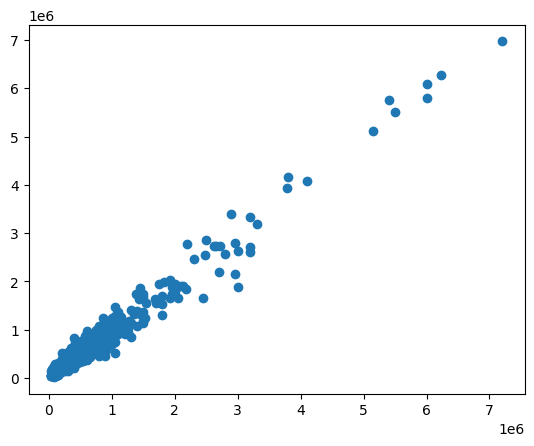

In [150]:
plt.scatter(y_val, y_val_predxgb)

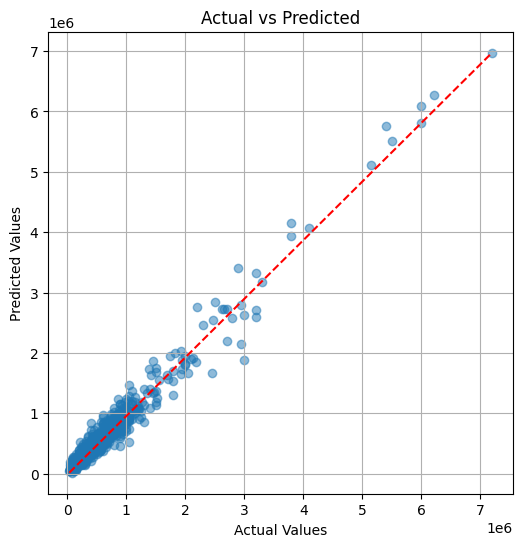

In [151]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_val_predxgb, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val_predxgb), max(y_val_predxgb)], 'r--')  # diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

In [ ]:
print(f'R_Score of simple XGBRegression model for Train data: {r2_score(y_train, xgb.predict(X_train_scaled))}')

0.9596728086471558

### Much better than previous models. 
### Will still check for LGBMRegressor as well.

# Using LGBMRegressor.

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(max_depth=3, n_estimators=100, metric='rmse')

lgbm.fit(X_train_scaled, y_train)

y_val_predlg = lgbm.predict(X_val_scaled)

print(f'R_Score of simple LGBMRegression model for validation data: {r2_score(y_val, y_val_predlg)}')

c:\Users\ASUS\anaconda3\envs\anu\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ASUS\anaconda3\envs\anu\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\envs\anu\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\envs\anu\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^

0.9375644006933103

In [ ]:
mae = mean_absolute_error(y_val, y_val_predlg)

print(f'Mean Absolute Error for LGBMRegressor on validation data: {mae}')

89858.77315693475

# After checking different ML models, only xgb has given the best performance with its base parameters. 
## Hence I will be choosing XGB for the final prediction.
## Will be using randomsearchcv to get the best parameters for this model, then I will test it on my test data.

In [159]:
from sklearn.model_selection import RandomizedSearchCV


xgb_search = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

random_search = RandomizedSearchCV(
    estimator=xgb_search,
    param_distributions=param_grid,
    n_iter=50,             # number of random combinations to try
    scoring='neg_mean_squared_error',  # metric to optimize
    cv=3,                  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)


In [160]:
random_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.7, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], ...}"
,n_iter,50
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [162]:
import numpy as np

In [163]:
print("Best Hyperparameters:", random_search.best_params_)

best_model = random_search.best_estimator_

# Evaluate on validation or test set
y_val_pred = best_model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("Validation RMSE:", rmse)

Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 0.01, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.8}
Validation RMSE: 100580.98364999221


In [165]:
mae = mean_absolute_error(y_val, y_val_pred)

mae

68041.5

In [ ]:
print(f'R_score for XGBRegressor with best parameter for val_data : {r2_score(y_val, y_val_pred)}')

0.9743562340736389

In [166]:
y_test_pred = best_model.predict(X_test_scaled)

In [ ]:
print(f'R_score for XGBRegressor with best parameter for test_data : {r2_score(y_test, y_test_pred)}')

0.9709580540657043

In [168]:
print(f'MAE for XGBRegressor with best parameter for test_data : {mean_absolute_error(y_test, y_test_pred)}')

MAE for XGBRegressor with best parameter for test_data : 65873.890625


# Our model variance for test data is around 97%.
# And MAE is around 65k. Which is quite low when we started with our base model.